In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, fftfreq, rfft, irfft
from scipy import signal
from scipy.io import wavfile


METHOD 4:
Filtering before convoluting in frequency domain
Timeshift: 0.0005668934240362812
Sampleshift: 25


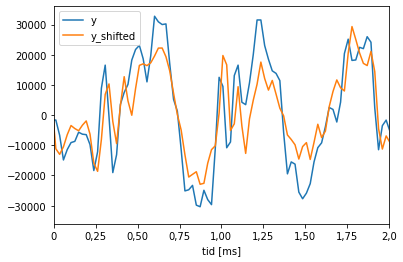

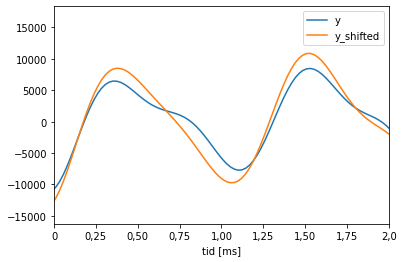

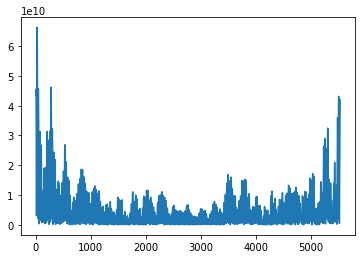

Wall time: 839 ms


In [4]:
%%time
#samplerate_y, y_lol = wavfile.read('audio_input/602msTo702ms.wav')
#samplerate_y2, y2_lol = wavfile.read('audio_input/600msTo700ms.wav')
samplerate_y, y_lol = wavfile.read('audio_input/Mic1.wav')
samplerate_y2, y2_lol = wavfile.read('audio_input/Mic0.wav')

y = y_lol #np.pad(y_lol, (0,3782))
y2 = y2_lol  #np.pad(y2_lol,(0,3782))

# Define time steps for shifting.
dt = (1/samplerate_y)

# Number of samples.
n = len(y)

# Calculate time length of signal
lengthY = (1/samplerate_y) * len(y)

# Generate fft bin frequency 
freq = fftfreq(n, dt)

# Windowing of Inputs
y = y * np.hamming(n)
y2 = y2 * np.hamming(n)

## METHOD 3 - Filtering before convoluting ##
print("\nMETHOD 4:")
print("Filtering before convoluting in frequency domain")
myFilter = signal.butter(10,[500,1500],'bandpass',output='sos',fs=samplerate_y)
y_filtered = signal.sosfilt(myFilter,y)
y2_filtered = signal.sosfilt(myFilter,y2)

# Generate FFT
Y_filtered = fft(y_filtered)
Y2_filtered = fft(y2_filtered)

# Calculate the complex conjugated signal
Yr_filtered = Y_filtered.conjugate() 
Y2r_filtered = Y2_filtered #.conjugate() 
# Convolute the signals.
conv = Yr_filtered*Y2r_filtered
# Inverse FFT to convert to time domain.
iffconv = ifft(conv)
# Calculate time pr sample
timePrIndex = 1/samplerate_y

# Calculate the time shift: Find the index with the highest area overlap of the signals
maxAreaIndex = np.argmax(np.abs(iffconv)) #+1
#maxAreaIndex = np.argmax(np.square(iffconv))#######

#print(maxAreaIndex)
m2timeShift = (maxAreaIndex * timePrIndex)

#m2timeShift = (88 * timePrIndex)/2
print("Timeshift: " + str(m2timeShift))
print("Sampleshift: " + str(maxAreaIndex))

# # Debugging
time = np.linspace((-n * dt)/2, (n * dt)/2, n)
# Shift the original (shifted) signal the calculated value
Y2 = fft(y2)
Y2_shifted = Y2 * np.exp(1j * 2 * np.pi * freq * (m2timeShift))
y2_shifted = ifft(Y2_shifted).real
# Show with real signal
plt.figure(0)
plt.plot(time, y, label="y")
plt.plot(time, y2_shifted, label="y_shifted")
plt.xlabel("tid [ms]")
plt.xticks([0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002],['0','0,25','0,50','0,75','1,00','1,25','1,50','1,75','2,0'])
plt.legend()
plt.xlim(0,0.002)
# Shift the filtered signal
Y2_filt_shifted = Y2_filtered * np.exp(1j * 2 * np.pi * freq * (m2timeShift))
y2_filt_shifted = ifft(Y2_filt_shifted).real
# Show with filtered signal
plt.figure(1)
plt.plot(time, y_filtered, label="y")
plt.plot(time, y2_filt_shifted, label="y_shifted")
plt.xlabel("tid [ms]")
plt.xticks([0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002],['0','0,25','0,50','0,75','1,00','1,25','1,50','1,75','2,0'])
plt.legend()
plt.xlim(0,0.002)

plt.figure(2)
plt.plot(np.abs(iffconv))

# Show figures.
plt.show()